In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


# _Hearing loss_

## <font color = yellow> _Situation/problem:_ </font>
Certain scenarios, action or habits may expose us to loud and painful sounds that may or may not leave us with a permanent loss of hearing. Sounds over 85 dBa can damage our hearing faster, a variety of scenario may belong to this certain threshold, this includes simple everyday things like lawnmoers,power tools, listening to music with a headset at full volume  to jet planes taking off, jackhammers and fireworks. With the said threshold, we still have to consider the amount of time being exposed and also the amount of distance away from the source of the sound. Over 30mins 90dBa to 110 dBa may be acceptible or it wouldnt leave you with permanent damage, then beyond that, it will only take 30 sec with a 120 dBa to damage  our ears.

## <font color = yellow> _Explanation:_ </font>
The safe listening time is cut in half for
every 3-dB rise in noise levels over 85 dBA. For example, you can listen to sounds at 85 dBA for
up to 8 hours. If the sound goes up to 88 dBA, it is safe to listen to those same sounds for 4 hours.
And if the sound goes up to 91 dBA, your safe listening time is down to 2 hours.

# <font color = yellow> _Fuzzy logic Application to the scenario_ </font>
## my implementation would include:
<font color = yellow>time </font>-the duration of exposure to certain amount of dba
<br><font color = yellow>decible </font>- the dBa from the source itself


# <font color = yellow> _Purpose for this fuzzy logic expert system:_ </font>
The purpose of this fuzzy logic system is to give us an idea of how much exposure to sound and the amount of time we can be exposed that our ear can handle without having a permanent loss of hearing. Although this may already be evident by simply saying that: "the sound is loud therefore it can damage your ear" or "you have been listening to loud music for a prolonged period of time therefore your hearing could be damaged". All of this may be elaborated and be provided with more accuracy and freedom in quantifying whether such sound is 







C:\Users\CLARK\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


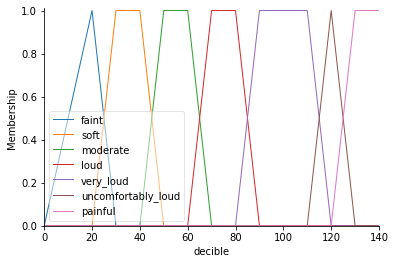

In [2]:
decible = ctrl.Antecedent(np.arange(0, 141, 1), 'decible')

decible['faint'] = fuzz.trimf(decible.universe, [0, 20, 30])
decible['soft'] = fuzz.trapmf(decible.universe, [20, 30, 40,50])
decible['moderate'] = fuzz.trapmf(decible.universe, [40, 50, 60,70])
decible['loud'] = fuzz.trapmf(decible.universe, [60, 70, 80,90])
decible['very_loud'] = fuzz.trapmf(decible.universe, [80, 90, 110,120])
decible['uncomfortably_loud'] = fuzz.trimf(decible.universe, [110, 120, 130])
decible['painful'] = fuzz.trapmf(decible.universe, [120, 130, 140,170])

decible.view()



C:\Users\CLARK\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


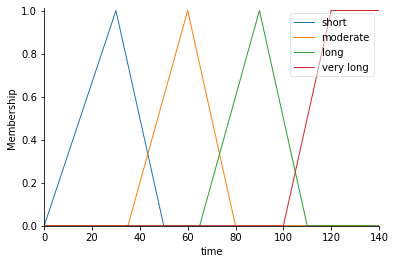

In [3]:
time = ctrl.Antecedent(np.arange(0, 141, 1), 'time')

time['short'] = fuzz.trimf(time.universe, [0, 30, 50])
time['moderate'] = fuzz.trimf(time.universe, [35, 60, 80])
time['long'] = fuzz.trimf(time.universe, [65, 90, 110])
time['very long'] = fuzz.trapmf(time.universe, [100,120,150, 150])

time.view()


C:\Users\CLARK\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


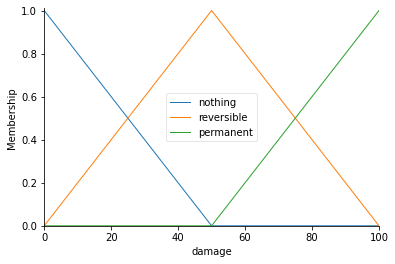

In [4]:
damage = ctrl.Consequent(np.arange(0, 101, 1), 'damage')

damage['nothing'] = fuzz.trimf(damage.universe, [0, 0, 50])
damage['reversible'] = fuzz.trimf(damage.universe, [0, 50, 100])
damage['permanent'] = fuzz.trimf(damage.universe, [50, 100, 100])


damage.view()

In [5]:

rule1 = ctrl.Rule(decible['faint'] & time['short']|time['moderate']|time['long']|time['very long'], damage['nothing'])
rule2 = ctrl.Rule(decible['soft'] & time['short']|time['moderate']|time['long']|time['very long'], damage['nothing'])
rule3 = ctrl.Rule(decible['moderate'] & time['short']|time['moderate']|time['long']|time['very long'], damage['nothing'])

rule4 = ctrl.Rule(decible['loud'] & time['short']|time['moderate']|time['long'], damage['nothing'])
rule5 = ctrl.Rule(decible['loud'] & time['very long'], damage['reversible'])


rule6 = ctrl.Rule(decible['very_loud'] & time['short'], damage['nothing'])
rule7 = ctrl.Rule(decible['very_loud'] & time['short']|time['moderate']|time['long'], damage['reversible'])
rule8 = ctrl.Rule(decible['very_loud'] & time['very long'], damage['reversible'])


rule10 = ctrl.Rule(decible['uncomfortably_loud'] & time['short']|time['moderate']|time['long']|time['very long'], damage['permanent'])
rule11 = ctrl.Rule(decible['painful'] & time['short']|time['moderate']|time['long']|time['very long'], damage['permanent'])

damage_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule10,rule11])

damages = ctrl.ControlSystemSimulation(damage_ctrl)







In [6]:
damages.input['decible'] = 140
damages.input['time'] = 10

In [7]:
damages.input['decible'] = 10
damages.input['time'] = 10

21.111111111111097


C:\Users\CLARK\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


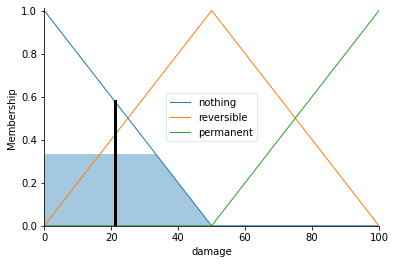

In [8]:


damages.compute()
print(damages.output['damage'])
damage.view(sim=damages)


